# Marketing Mix Modelling
In this project we analyse marketing spends data and try to understand its relationship with sales for that calendar week. Using insights from the above analysis we will build a forecasting model.

### Importing Libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data and Basic Data Understanding

In [152]:
df =  pd.read_csv("data/Sample Media Spend Data.csv")

df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,1/6/2018,392,422,408,349895.0107,73580,12072,682,59417
1,A,1/13/2018,787,904,110,506270.2176,11804,9499,853,56806
2,A,1/20/2018,81,970,742,430042.1538,52232,17048,759,48715
3,A,1/27/2018,25,575,65,417745.6658,78640,10207,942,72047
4,A,2/3/2018,565,284,295,408505.8012,40561,5834,658,56235


In [153]:
df.columns

Index(['Division', 'Calendar_Week', 'Paid_Views', 'Organic_Views',
       'Google_Impressions', 'Email_Impressions', 'Facebook_Impressions',
       'Affiliate_Impressions', 'Overall_Views', 'Sales'],
      dtype='object')

In [154]:
df.columns = map(str.lower, df.columns)
df = df[:-1].reset_index(drop = True)
final_test = df[-1:]

In [155]:
final_test.head()

,division,calendar_week,paid_views,organic_views,google_impressions,email_impressions,facebook_impressions,affiliate_impressions,overall_views,sales
3049,Z,2/22/2020,20713,30356,464178,608579.9078,424676,10221,49221,111525


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   division               3050 non-null   object 
 1   calendar_week          3050 non-null   object 
 2   paid_views             3050 non-null   int64  
 3   organic_views          3050 non-null   int64  
 4   google_impressions     3050 non-null   int64  
 5   email_impressions      3050 non-null   float64
 6   facebook_impressions   3050 non-null   int64  
 7   affiliate_impressions  3050 non-null   int64  
 8   overall_views          3050 non-null   int64  
 9   sales                  3050 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 238.4+ KB


In [157]:
df['date'] = pd.to_datetime(df['calendar_week'])
df['day'] = [x.day for x in df['date']]
df['week'] = df['date'].dt.isocalendar().week.astype('int')
df['month'] = [x.month for x in df['date']]
df['year'] = [x.year for x in df['date']]
df.year.value_counts(), df.month.value_counts(), df.day.value_counts(), df['week'].value_counts()
df['date'] = pd.to_datetime(df['date'])

# set date as index
df = df.set_index('date').sort_index()

# check if weekly frequency is consistent
print(df.index.to_series().diff().value_counts().head())

date
0 days    2937
7 days     112
Name: count, dtype: int64


In [158]:
print(df.info())
print(df.describe().T)
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3050 entries, 2018-01-06 to 2020-02-29
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   division               3050 non-null   object 
 1   calendar_week          3050 non-null   object 
 2   paid_views             3050 non-null   int64  
 3   organic_views          3050 non-null   int64  
 4   google_impressions     3050 non-null   int64  
 5   email_impressions      3050 non-null   float64
 6   facebook_impressions   3050 non-null   int64  
 7   affiliate_impressions  3050 non-null   int64  
 8   overall_views          3050 non-null   int64  
 9   sales                  3050 non-null   int64  
 10  day                    3050 non-null   int64  
 11  week                   3050 non-null   int64  
 12  month                  3050 non-null   int64  
 13  year                   3050 non-null   int64  
dtypes: float64(1), int64(11), object(2)
me

In [159]:
def get_num_cat_columns(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    num = df.select_dtypes(include=numerics).columns.to_list()
    cat = df.select_dtypes(include=['object']).columns.to_list()
    return num, cat

In [160]:
numeric_columns, categorical_columns  = get_num_cat_columns(df)
numeric_columns, categorical_columns

(['paid_views',
  'organic_views',
  'google_impressions',
  'email_impressions',
  'facebook_impressions',
  'affiliate_impressions',
  'overall_views',
  'sales',
  'day',
  'week',
  'month',
  'year'],
 ['division', 'calendar_week'])

In [161]:
for col in categorical_columns:
    print(df[col].value_counts())

division
Z    225
A    113
E    113
V    113
R    113
F    113
W    113
C    113
Y    113
D    113
M    113
P    113
X    113
U    113
I    113
H    113
G    113
N    113
K    113
J    113
O    113
Q    113
L    113
S    113
T    113
B    113
Name: count, dtype: int64
calendar_week
1/6/2018     27
1/13/2018    27
1/20/2018    27
1/27/2018    27
2/3/2018     27
             ..
2/1/2020     27
2/8/2020     27
2/15/2020    27
2/22/2020    27
2/29/2020    26
Name: count, Length: 113, dtype: int64


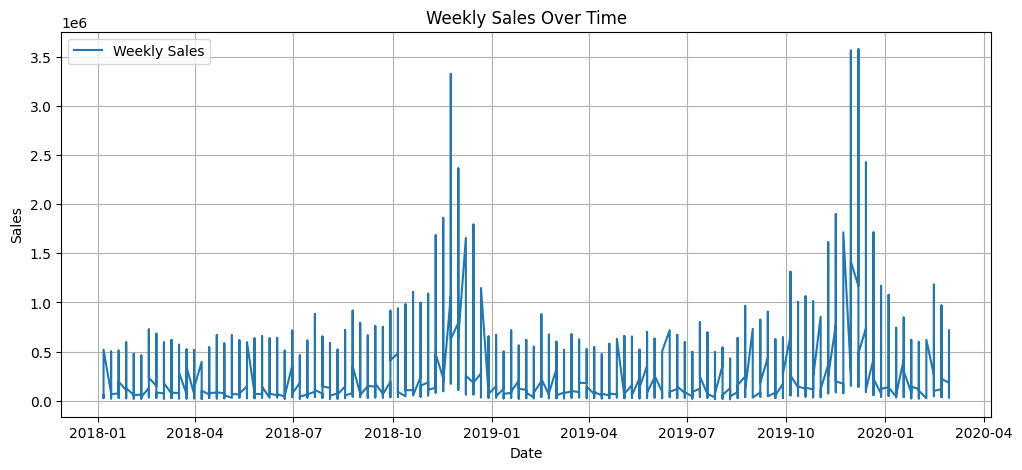

In [162]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['sales'], label="Weekly Sales")
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


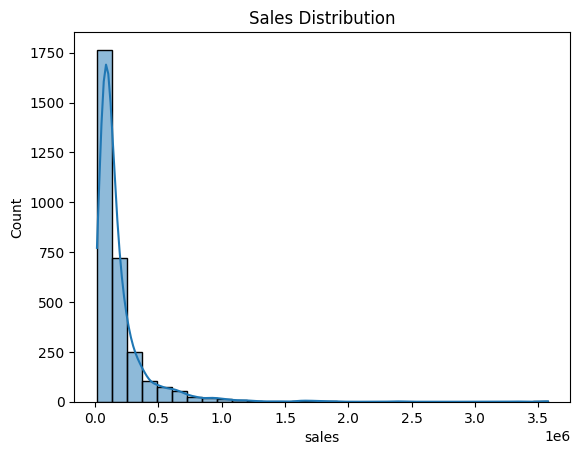

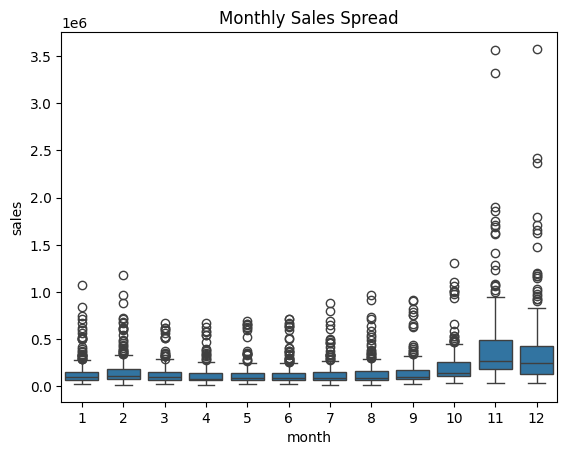

In [163]:
sns.histplot(df['sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

df['month'] = df.index.month
sns.boxplot(x='month', y='sales', data=df.reset_index())
plt.title("Monthly Sales Spread")
plt.show()


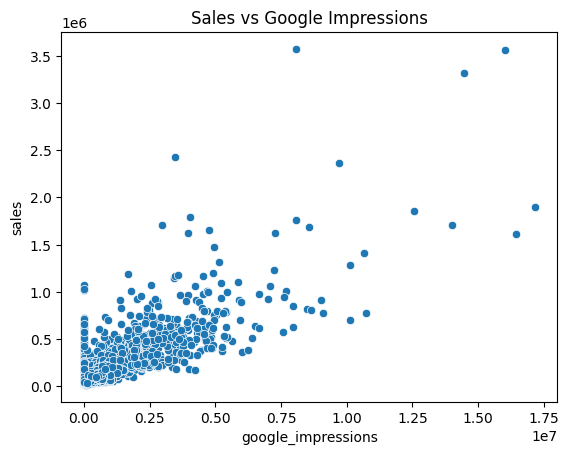

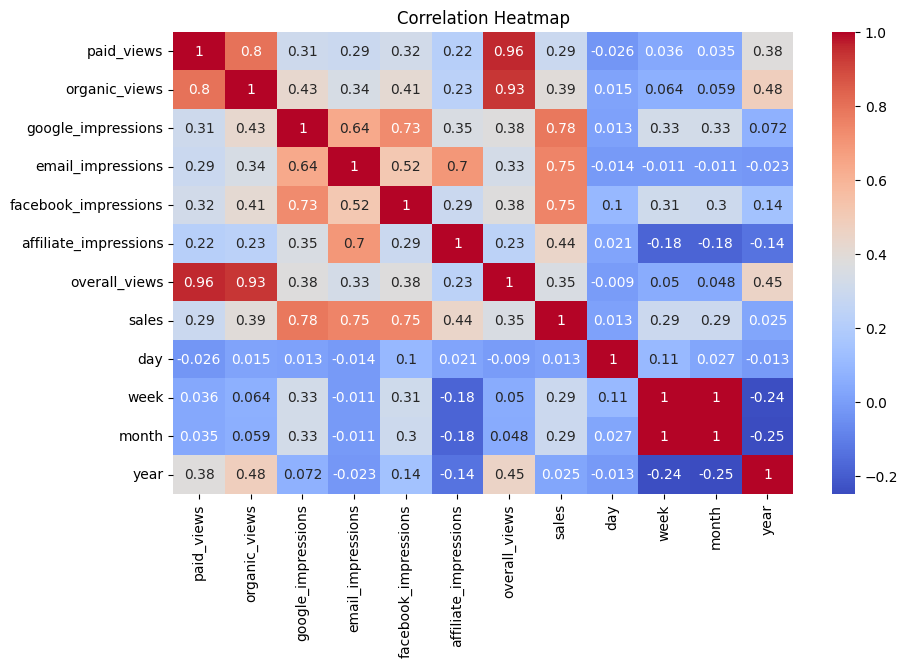

In [164]:
# scatter vs google impressions
sns.scatterplot(x=df['google_impressions'], y=df['sales'])
plt.title("Sales vs Google Impressions")
plt.show()

# correlation matrix
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


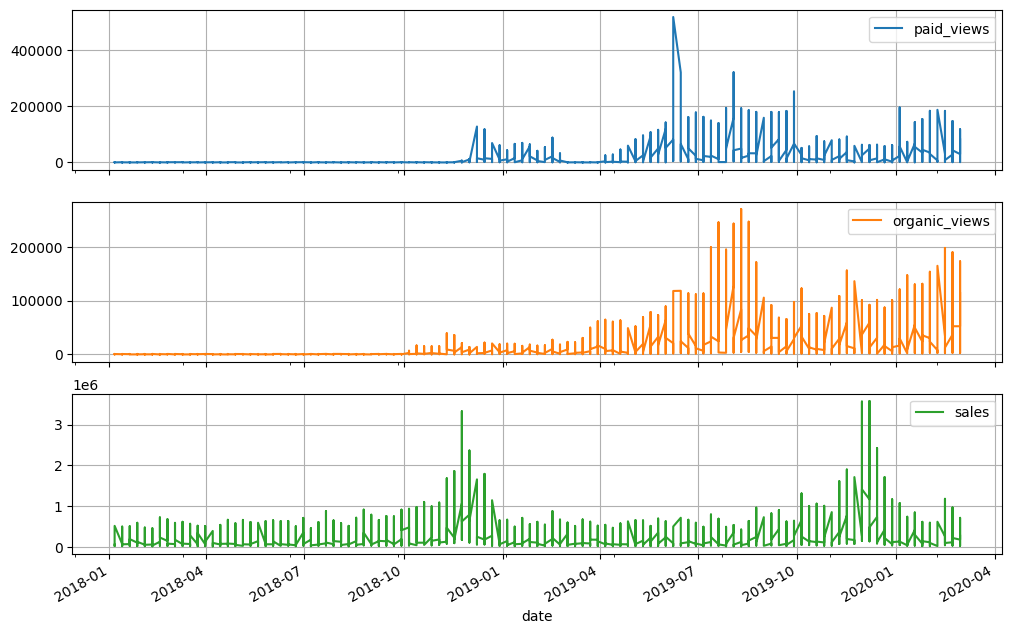

In [165]:
df[['paid_views','organic_views','sales']].plot(subplots=True, figsize=(12,8), grid=True)
plt.show()

### Insights
Sales is directly proportional to (important features for model):
- facebook_impressions
- email_impressions
- google_impressions 
- affiliate_impressions

### EDA Findings
1. Sales Over Time
Sales are mostly in the hundreds of thousands, with some very large spikes in late 2018 and late 2019 → likely seasonal promotions or campaigns.
Sales do not follow a smooth trend; instead, they show weekly fluctuations with occasional extreme outliers.
Action: We may need to treat those spikes carefully (either keep as true events or smooth them).

2. Correlation Heatmap
Strong correlations:
sales with google_impressions (0.78), email_impressions (0.75), and facebook_impressions (0.75) → strong predictors.
overall_views is highly correlated with both paid_views (0.96) and organic_views (0.93), so they might be redundant.
Weak correlation:
affiliate_impressions has much weaker relation to sales.
Action: Focus on google, email, facebook impressions as exogenous features. Be cautious of multicollinearity (too high correlation between features).

3. Scatterplots
Sales vs impressions/views show positive relationships (more ads → higher sales).
Different divisions behave differently, but the overall pattern is still consistent.
Some divisions might generate very high sales for the same impression levels (division-level effects).
Action: We may later consider division as a categorical feature if we want more granular forecasting.

EDA Summary
Sales are weekly, spiky, seasonal -> good candidate for SARIMAX with exogenous features.
Google, Email, and Facebook impressions are the most important drivers.
Paid/organic views are redundant with overall views → we might drop one set later.
Some outliers (campaign spikes) should be treated carefully (maybe log-transform sales or use robust models).


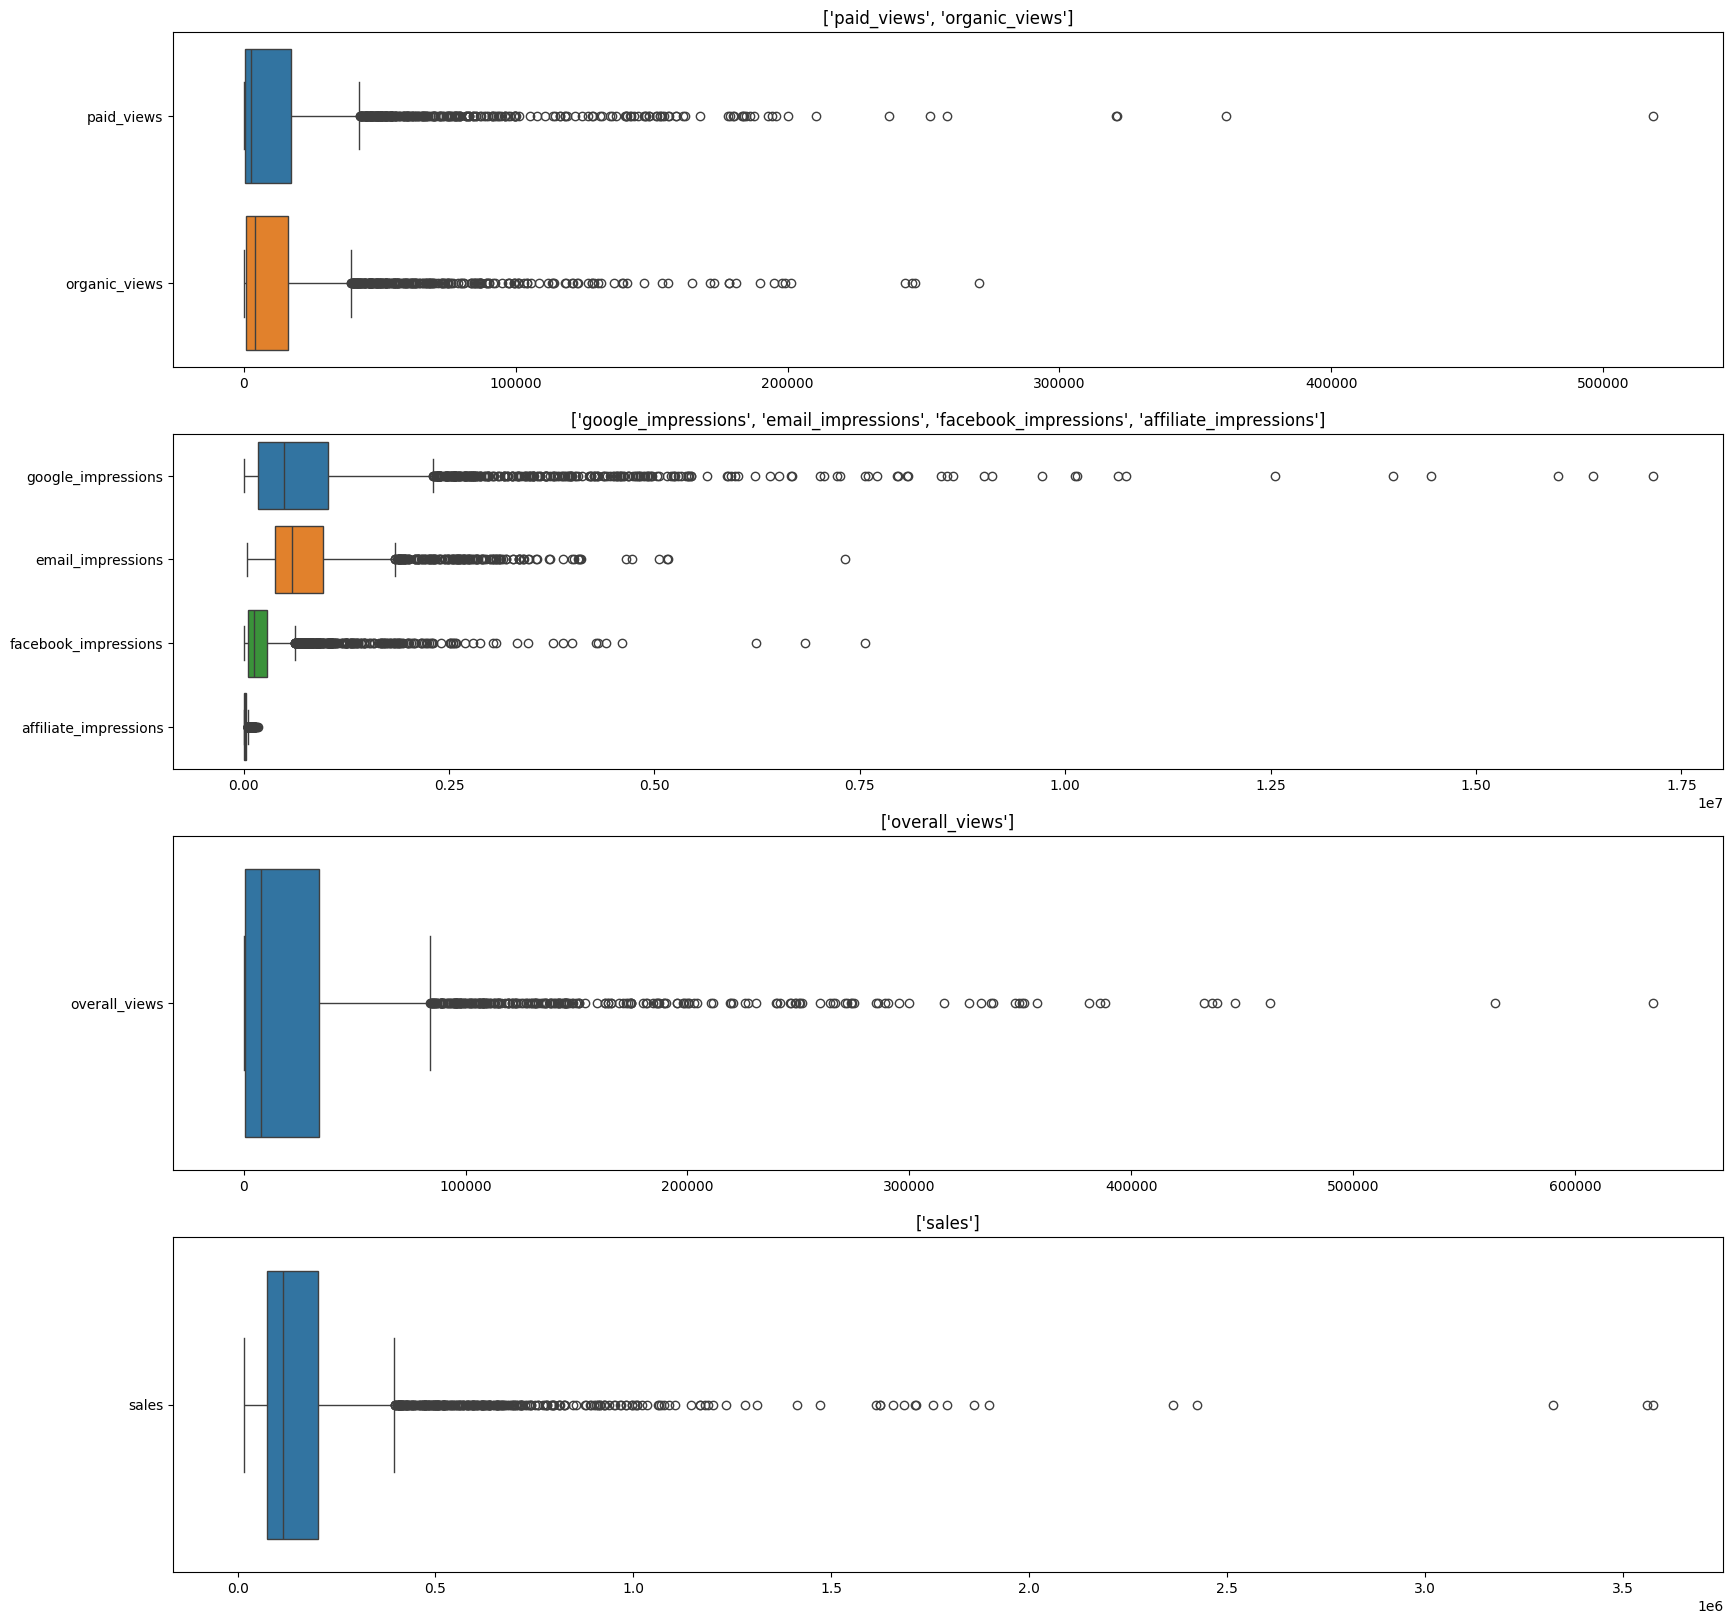

In [166]:
column_batches = [['paid_views', 'organic_views'],['google_impressions', 'email_impressions', 'facebook_impressions',
       'affiliate_impressions',],['overall_views'],['sales']]
plt.figure(figsize=(20,20))
for n,i in enumerate(column_batches):
    plt.subplot(4,1,n+1)
    sns.boxplot(df[i], orient="h")
    plt.title(i)

### Insights 
The given dataset has 
- 3051 rows of data
- 10 columns of which 2 are categorical columns - 'Division', 'Calendar_Week' and remaining are numeric columns.
- categorical columns needed to be converted into numeric values
- None of the columns have null value. No missing value treatment needed
- Week of Year can be split into month, day, year and week number
- Outlier treatment needed
- sales is dirdectly proportional to email_impressions

# Data Cleaning

In [167]:
def treat_outliers(df_in, col):
    q1 = df_in[col].quantile(0.25)
    q3 = df_in[col].quantile(0.75)
    iqr = q3-q1
    upper_bound = q3+1.5*iqr
    df_in[col][df_in[col] >= upper_bound] = upper_bound
    return df_in


In [168]:
fields_to_outlier_treatment = [
    'paid_views',
    'organic_views',
    'google_impressions',
    'email_impressions',
    'facebook_impressions',
    'affiliate_impressions',
    'overall_views',
    'sales'
]
for col in fields_to_outlier_treatment:
    df = treat_outliers(df, col)

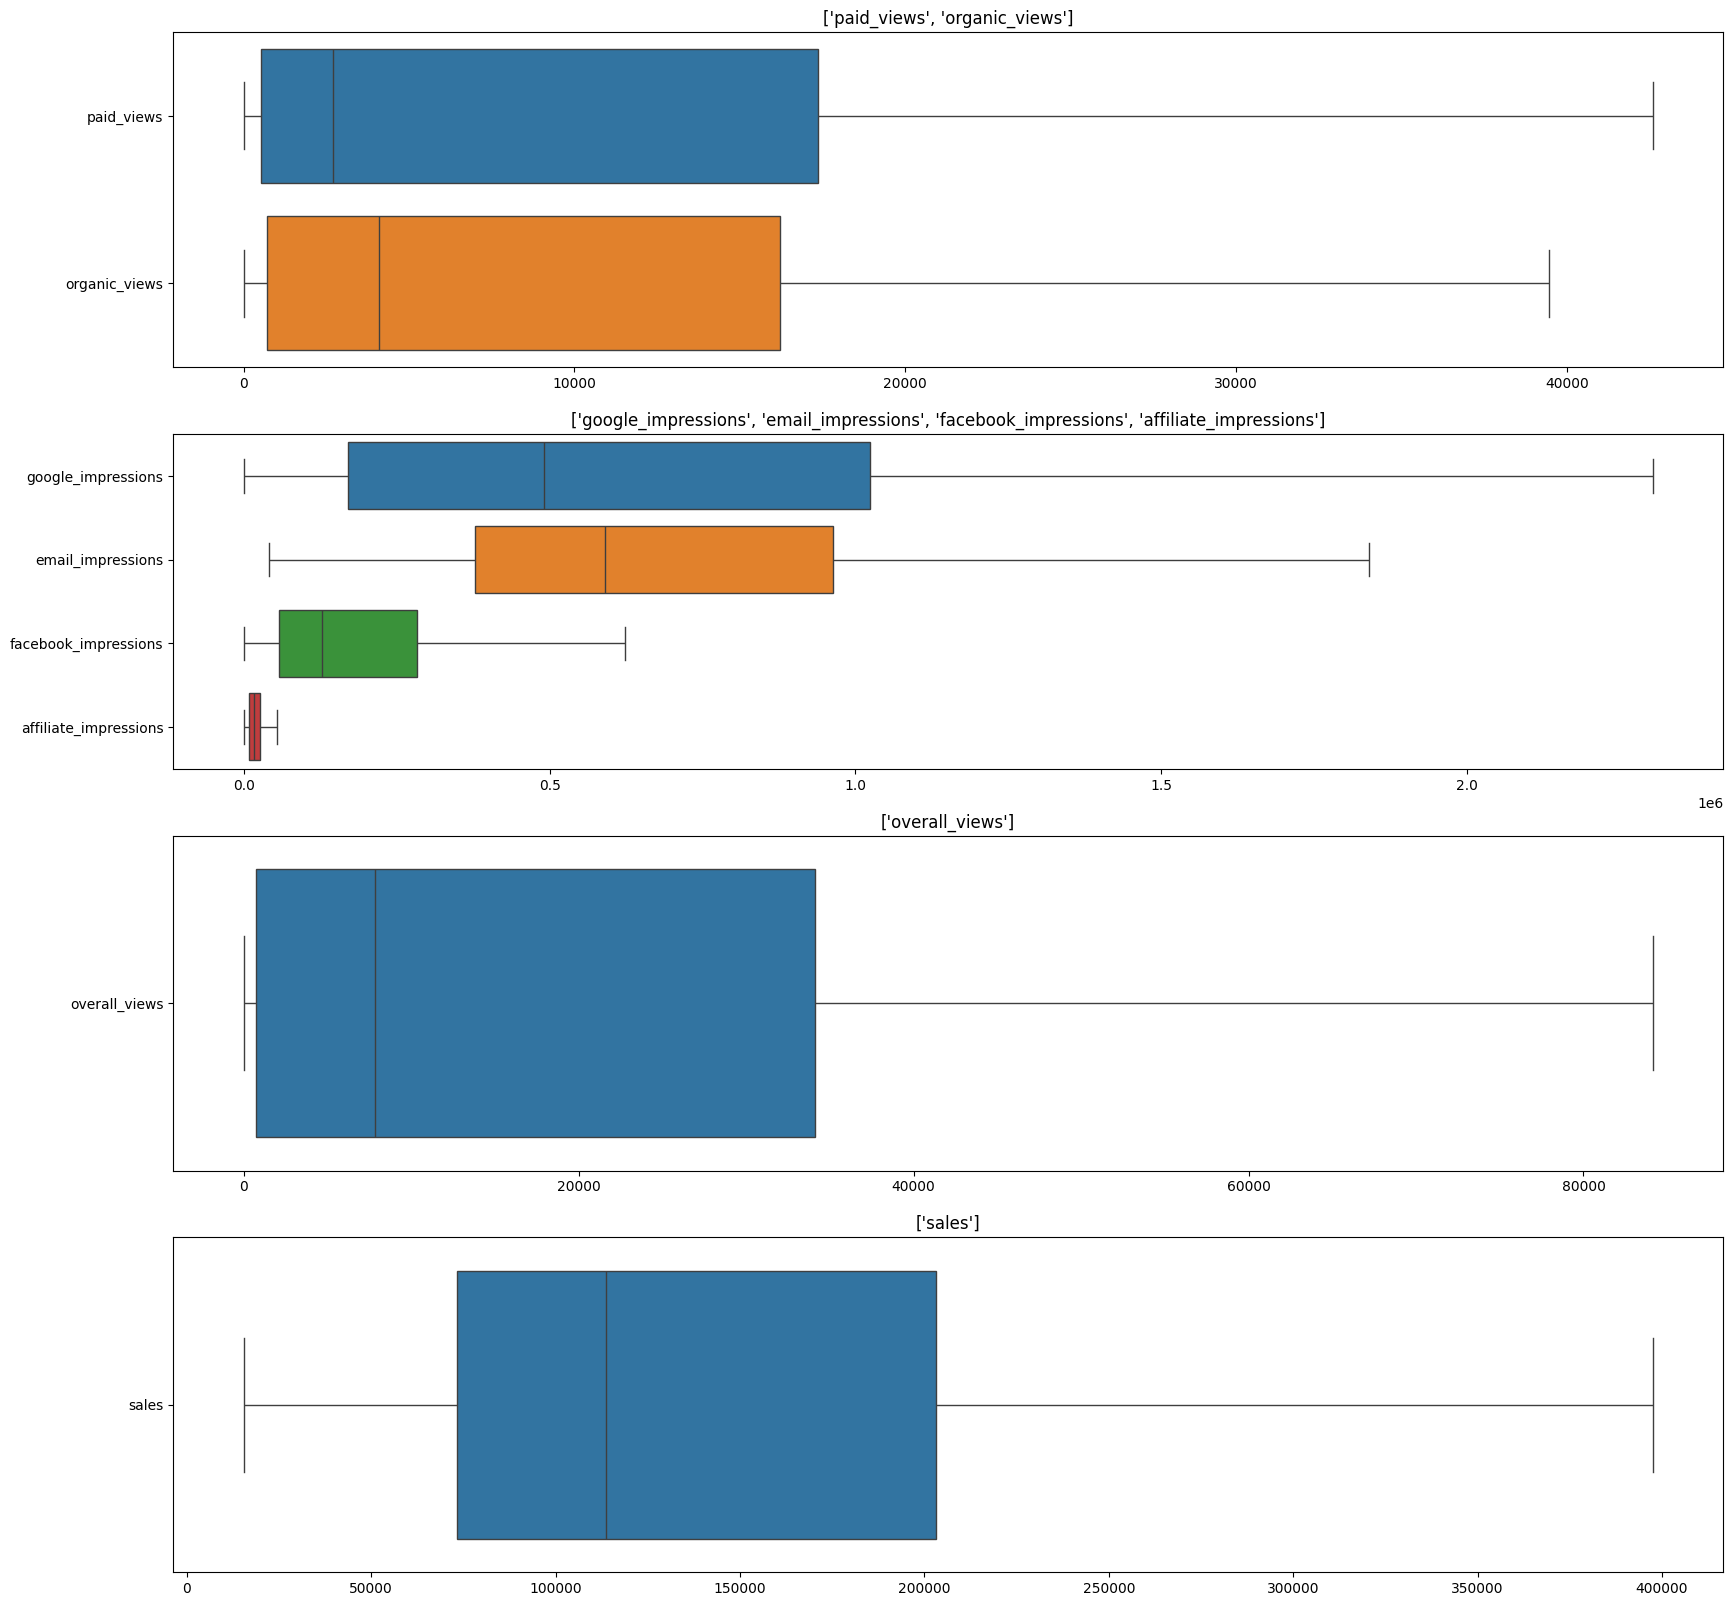

In [169]:
# plotting to check if oultiers are still present
column_batches = [['paid_views', 'organic_views'],['google_impressions', 'email_impressions', 'facebook_impressions',
       'affiliate_impressions',],['overall_views'],['sales']]
plt.figure(figsize=(20,20))
for n,i in enumerate(column_batches):
    plt.subplot(4,1,n+1)
    sns.boxplot(df[i], orient="h")
    plt.title(i)

# Feature Engineering

In [170]:
# df['date'] = pd.to_datetime(df['calendar_week'])
# df['day'] = [x.day for x in df['date']]
# df['week'] = df['date'].dt.isocalendar().week.astype('int')
# df['month'] = [x.month for x in df['date']]
# df['year'] = [x.year for x in df['date']]
# df.year.value_counts(), df.month.value_counts(), df.day.value_counts(), df['week'].value_counts()

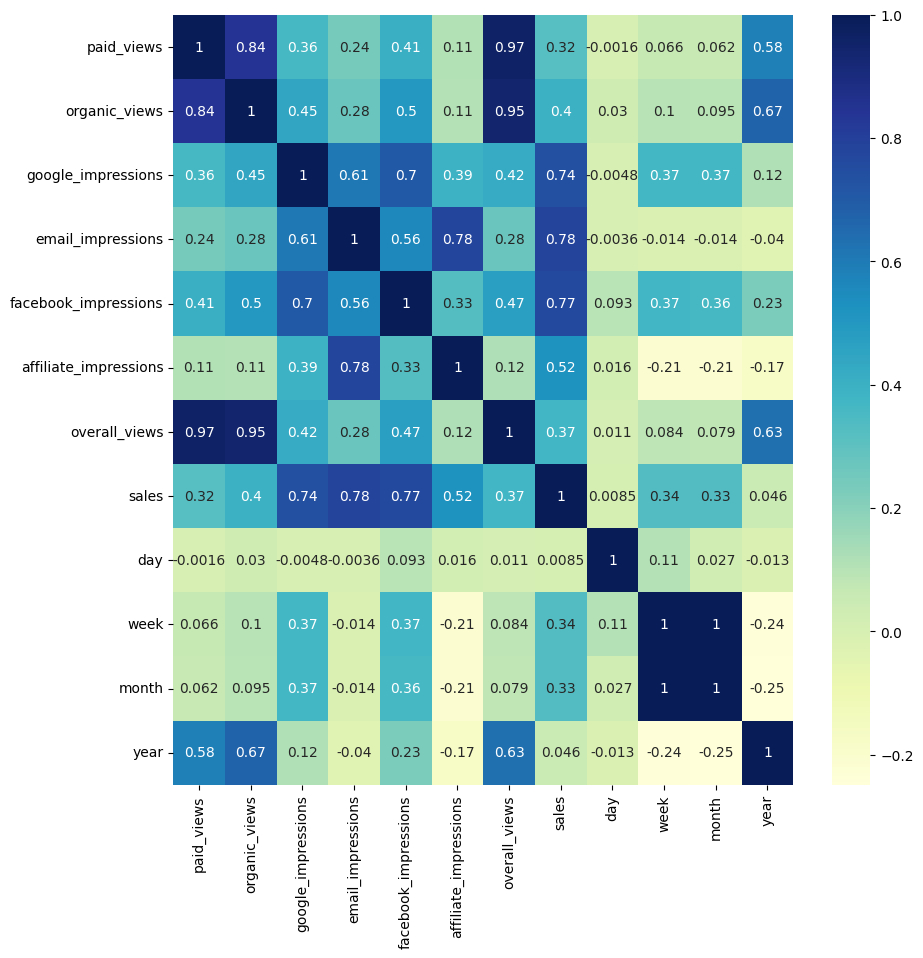

In [171]:
numeric_columns,_ = get_num_cat_columns(df)
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_columns].corr(), cmap="YlGnBu", annot=True);

#### Insights : High Coorelation
Amoung highly coorelated features we should keep only one of these features in the final model.
- month and week is highly coorelated.
- overall_views is highly correlated with paid_views and organic_views. paid_views and organic_views are highly coorelated.
- affiliate_impressions and email_impressions are highly coorelated.
- facebook_impressions and google_impressions are highly coorelated.
- We will use VIF to check if this coorelation impacts the model.


Sales has Highest Correlation with (important features for model):
- facebook_impressions, 
- email_impressions, 
- google_impressions and 
- affiliate_impressions



In [172]:
df.head()

,division,calendar_week,paid_views,organic_views,google_impressions,email_impressions,facebook_impressions,affiliate_impressions,overall_views,sales,day,week,month,year
date,,,,,,,,,,,,,,
2018-01-06,A,1/6/2018,392,422.0,408.0,3.498950e+05,73580.0,12072.000,682.0,59417,6,1,1,2018
2018-01-06,E,1/6/2018,291,146.0,151.0,1.363087e+06,326747.0,55035.875,576.0,287095,6,1,1,2018
2018-01-06,V,1/6/2018,736,332.0,668.0,1.152115e+06,225511.0,55035.875,901.0,170591,6,1,1,2018
2018-01-06,R,1/6/2018,128,343.0,853.0,1.982789e+05,31291.0,7732.000,952.0,60119,6,1,1,2018
2018-01-06,Z,1/6/2018,165,346.0,440.0,9.393009e+05,156226.0,43811.000,223.0,113911,6,1,1,2018


In [175]:
df.head()

,division,calendar_week,paid_views,organic_views,google_impressions,email_impressions,facebook_impressions,affiliate_impressions,overall_views,sales,day,week,month,year
date,,,,,,,,,,,,,,
2018-01-06,A,1/6/2018,392,422.0,408.0,3.498950e+05,73580.0,12072.000,682.0,59417,6,1,1,2018
2018-01-06,E,1/6/2018,291,146.0,151.0,1.363087e+06,326747.0,55035.875,576.0,287095,6,1,1,2018
2018-01-06,V,1/6/2018,736,332.0,668.0,1.152115e+06,225511.0,55035.875,901.0,170591,6,1,1,2018
2018-01-06,R,1/6/2018,128,343.0,853.0,1.982789e+05,31291.0,7732.000,952.0,60119,6,1,1,2018
2018-01-06,Z,1/6/2018,165,346.0,440.0,9.393009e+05,156226.0,43811.000,223.0,113911,6,1,1,2018


In [176]:
df_agg = df.groupby('date').sum(numeric_only=True).sort_index()

In [179]:
df_agg.head()

,paid_views,organic_views,google_impressions,email_impressions,facebook_impressions,affiliate_impressions,overall_views,sales,day,week,month,year
date,,,,,,,,,,,,
2018-01-06,11247,11214.0,16934.0,1.773450e+07,3650322.875,900736.250,16447.0,2839927,162,27,27,54486
2018-01-13,15453,12580.0,12548.0,2.445215e+07,626000.000,845259.250,17111.0,2940233,351,54,27,54486
2018-01-20,12759,13145.0,14895.0,2.134484e+07,2304353.000,1018237.875,11919.0,2854916,540,81,27,54486
2018-01-27,10709,15208.0,13324.0,2.081611e+07,3421558.875,774796.625,13857.0,3162844,729,108,27,54486
2018-02-03,13416,15129.0,12932.0,2.038368e+07,2008599.000,626548.875,16783.0,3075967,81,135,54,54486


In [181]:
df.shape, df_agg.shape

((3050, 14), (113, 12))

In [182]:
# Keep only the columns we need
keep_cols = [c for c in [
    'sales','overall_views',
    'google_impressions','email_impressions','facebook_impressions'
] if c in df_agg.columns]
weekly = df_agg[keep_cols].copy()

In [183]:
weekly.head()

,sales,overall_views,google_impressions,email_impressions,facebook_impressions
date,,,,,
2018-01-06,2839927,16447.0,16934.0,1.773450e+07,3650322.875
2018-01-13,2940233,17111.0,12548.0,2.445215e+07,626000.000
2018-01-20,2854916,11919.0,14895.0,2.134484e+07,2304353.000
2018-01-27,3162844,13857.0,13324.0,2.081611e+07,3421558.875
2018-02-03,3075967,16783.0,12932.0,2.038368e+07,2008599.000


In [184]:
# Fill missing exogenous values (not target)
exog_cols = [c for c in weekly.columns if c != 'sales']
weekly[exog_cols] = weekly[exog_cols].ffill().bfill()

In [185]:
# 2) Basic transforms
fe = weekly.copy()
fe['log_sales'] = np.log1p(fe['sales'])
for c in exog_cols:
    fe[f'log_{c}'] = np.log1p(fe[c])

In [186]:
fe.head()

,sales,overall_views,google_impressions,email_impressions,facebook_impressions,log_sales,log_overall_views,log_google_impressions,log_email_impressions,log_facebook_impressions
date,,,,,,,,,,
2018-01-06,2839927,16447.0,16934.0,1.773450e+07,3650322.875,14.859289,9.707959,9.737138,16.691022,15.110326
2018-01-13,2940233,17111.0,12548.0,2.445215e+07,626000.000,14.894000,9.747535,9.437396,17.012229,13.347107
2018-01-20,2854916,11919.0,14895.0,2.134484e+07,2304353.000,14.864553,9.385973,9.608848,16.876320,14.650311
2018-01-27,3162844,13857.0,13324.0,2.081611e+07,3421558.875,14.966982,9.536618,9.497397,16.851238,15.045607
2018-02-03,3075967,16783.0,12932.0,2.038368e+07,2008599.000,14.939130,9.728181,9.467537,16.830245,14.512949


In [187]:
# 3) Lag and rolling features
fe['sales_lag_1'] = fe['sales'].shift(1)
fe['sales_lag_4'] = fe['sales'].shift(4)
fe['sales_lag_8'] = fe['sales'].shift(8)
fe['sales_mean_4w'] = fe['sales'].rolling(4, min_periods=1).mean()


In [188]:
# 4) Seasonality features (week of year)
iso = fe.index.isocalendar()
fe['weekofyear'] = iso.week.astype(int)
fe['woy_sin'] = np.sin(2 * np.pi * fe['weekofyear'] / 52.0)
fe['woy_cos'] = np.cos(2 * np.pi * fe['weekofyear'] / 52.0)


In [189]:
features_weekly = fe.dropna().copy()

In [190]:
features_weekly.shape

(105, 17)

In [191]:
features_weekly.head()

,sales,overall_views,google_impressions,email_impressions,facebook_impressions,log_sales,log_overall_views,log_google_impressions,log_email_impressions,log_facebook_impressions,sales_lag_1,sales_lag_4,sales_lag_8,sales_mean_4w,weekofyear,woy_sin,woy_cos
date,,,,,,,,,,,,,,,,,
2018-03-03,3437736,13367.0,13514.0,2.105672e+07,561471.000,15.050324,9.500619,9.511555,16.862730,13.238317,3806212.0,3075967.0,2839927.0,3453402.75,9,0.885456,4.647232e-01
2018-03-10,3587350,14725.0,15125.0,2.316738e+07,3423921.875,15.092925,9.597370,9.624170,16.958256,15.046297,3437736.0,2743767.0,2940233.0,3664298.50,10,0.935016,3.546049e-01
2018-03-17,3456112,12896.0,15504.0,2.289277e+07,495818.000,15.055655,9.464750,9.648918,16.946332,13.113966,3587350.0,3825896.0,2854916.0,3571852.50,11,0.970942,2.393157e-01
2018-03-24,3418565,13809.0,13537.0,2.110565e+07,2849652.000,15.044732,9.533148,9.513256,16.865051,14.862708,3456112.0,3806212.0,3162844.0,3474940.75,12,0.992709,1.205367e-01
2018-03-31,3141482,12834.0,12061.0,2.124612e+07,1459787.000,14.960206,9.459931,9.397815,16.871685,14.193802,3418565.0,3437736.0,3075967.0,3400877.25,13,1.000000,-1.608123e-16


In [192]:
ML_FEATURE_COLS = [c for c in features_weekly.columns if c != 'sales']

In [193]:
# Columns for SARIMAX exogenous
SARIMAX_EXOG_COLS = [
    c for c in features_weekly.columns
    if c not in ['sales','log_sales','sales_lag_1','sales_lag_4','sales_lag_8','sales_mean_4w']
]


In [194]:
print("Final dataset shape:", features_weekly.shape)
print("\nPreview:")
display(features_weekly.head())

print("\nXGBoost feature count:", len(ML_FEATURE_COLS))
print("SARIMAX exogenous count:", len(SARIMAX_EXOG_COLS))

Final dataset shape: (105, 17)

Preview:


,sales,overall_views,google_impressions,email_impressions,facebook_impressions,log_sales,log_overall_views,log_google_impressions,log_email_impressions,log_facebook_impressions,sales_lag_1,sales_lag_4,sales_lag_8,sales_mean_4w,weekofyear,woy_sin,woy_cos
date,,,,,,,,,,,,,,,,,
2018-03-03,3437736,13367.0,13514.0,2.105672e+07,561471.000,15.050324,9.500619,9.511555,16.862730,13.238317,3806212.0,3075967.0,2839927.0,3453402.75,9,0.885456,4.647232e-01
2018-03-10,3587350,14725.0,15125.0,2.316738e+07,3423921.875,15.092925,9.597370,9.624170,16.958256,15.046297,3437736.0,2743767.0,2940233.0,3664298.50,10,0.935016,3.546049e-01
2018-03-17,3456112,12896.0,15504.0,2.289277e+07,495818.000,15.055655,9.464750,9.648918,16.946332,13.113966,3587350.0,3825896.0,2854916.0,3571852.50,11,0.970942,2.393157e-01
2018-03-24,3418565,13809.0,13537.0,2.110565e+07,2849652.000,15.044732,9.533148,9.513256,16.865051,14.862708,3456112.0,3806212.0,3162844.0,3474940.75,12,0.992709,1.205367e-01
2018-03-31,3141482,12834.0,12061.0,2.124612e+07,1459787.000,14.960206,9.459931,9.397815,16.871685,14.193802,3418565.0,3437736.0,3075967.0,3400877.25,13,1.000000,-1.608123e-16



XGBoost feature count: 16
SARIMAX exogenous count: 11


In [195]:
# ===============================
# STEP 3 — Preprocessing & Train/Test split
# ===============================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Train/Test split (time-based: first 80% train, last 20% test)
n = len(features_weekly)
split_idx = int(n * 0.8)

train = features_weekly.iloc[:split_idx]
test  = features_weekly.iloc[split_idx:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train period:", train.index.min(), "→", train.index.max())
print("Test period:", test.index.min(), "→", test.index.max())

# 2) Separate features and target
X_train = train[ML_FEATURE_COLS]
y_train = train['sales']
X_test  = test[ML_FEATURE_COLS]
y_test  = test['sales']

# 3) Standardize features (optional, mainly for regression/neural nets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print("\nScaled train features shape:", X_train_scaled.shape)


Train shape: (84, 17)
Test shape: (21, 17)
Train period: 2018-03-03 00:00:00 → 2019-10-05 00:00:00
Test period: 2019-10-12 00:00:00 → 2020-02-29 00:00:00

Scaled train features shape: (84, 16)


Naïve baseline:
  MAE  = 897,374.48
  RMSE = 1,190,023.69
  MAPE = 15.85%

Moving Average (4-week):
  MAE  = 1,419,383.92
  RMSE = 1,760,239.74
  MAPE = 25.53%

Moving Average (8-week):
  MAE  = 1,927,262.48
  RMSE = 2,227,260.37
  MAPE = 36.71%

Baseline leaderboard (lower is better):


,model,MAE,RMSE,MAPE%
0,Naive,8.973745e+05,1.190024e+06,15.845803
1,MA(4w),1.419384e+06,1.760240e+06,25.529462
2,MA(8w),1.927262e+06,2.227260e+06,36.708045


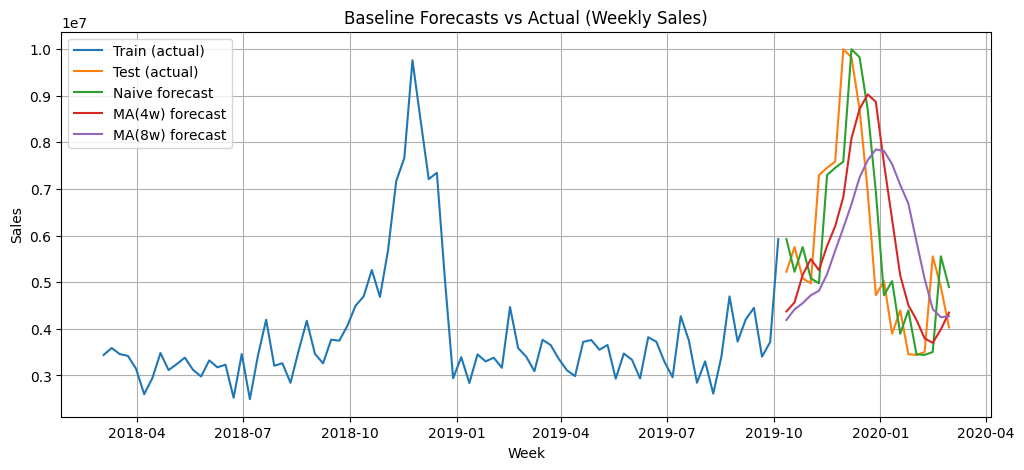

In [196]:
# ===============================
# STEP 4 — Baseline Models (Weekly)
# Naïve (last value) and Moving Average (4w & 8w)
# Uses variables from Step 3:
#   - train, test, y_train, y_test
# ===============================

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return math.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = np.where(y_true == 0, 1e-9, y_true)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100


# -------------------------------
# 1) Naïve baseline (last value)
# -------------------------------
# Forecast each test week as the previous week's *actual* sales (one-step ahead)
naive_pred = pd.Series(index=y_test.index, dtype=float)

# seed with the last observed train value
prev = y_train.iloc[-1]
for t in y_test.index:
    naive_pred.loc[t] = prev
    # for true one-step-ahead backtest, update prev with the *actual* realized value
    prev = y_test.loc[t]

naive_mae  = mae(y_test, naive_pred)
naive_rmse = rmse(y_test, naive_pred)
naive_mape = mape(y_test, naive_pred)

print("Naïve baseline:")
print(f"  MAE  = {naive_mae:,.2f}")
print(f"  RMSE = {naive_rmse:,.2f}")
print(f"  MAPE = {naive_mape:,.2f}%")

# -------------------------------
# 2) Moving Average baselines
# -------------------------------
def moving_average_forecast(y_train, y_test, window):
    """Walk-forward moving average using only data available up to t-1."""
    hist = list(y_train.values)  # start with training history
    preds = []
    for _ in range(len(y_test)):
        preds.append(np.mean(hist[-window:]))  # mean of last W actuals
        # append the *actual* realized value for the next step
        hist.append(y_test.iloc[len(preds)-1])
    return pd.Series(preds, index=y_test.index, dtype=float)

ma4_pred = moving_average_forecast(y_train, y_test, window=4)
ma8_pred = moving_average_forecast(y_train, y_test, window=8)

ma4_mae, ma4_rmse, ma4_mape = mae(y_test, ma4_pred), rmse(y_test, ma4_pred), mape(y_test, ma4_pred)
ma8_mae, ma8_rmse, ma8_mape = mae(y_test, ma8_pred), rmse(y_test, ma8_pred), mape(y_test, ma8_pred)

print("\nMoving Average (4-week):")
print(f"  MAE  = {ma4_mae:,.2f}")
print(f"  RMSE = {ma4_rmse:,.2f}")
print(f"  MAPE = {ma4_mape:,.2f}%")

print("\nMoving Average (8-week):")
print(f"  MAE  = {ma8_mae:,.2f}")
print(f"  RMSE = {ma8_rmse:,.2f}")
print(f"  MAPE = {ma8_mape:,.2f}%")


# -------------------------------
# 3) Compare & visualize
# -------------------------------
baseline_scores = pd.DataFrame({
    'model': ['Naive', 'MA(4w)', 'MA(8w)'],
    'MAE':   [naive_mae, ma4_mae, ma8_mae],
    'RMSE':  [naive_rmse, ma4_rmse, ma8_rmse],
    'MAPE%': [naive_mape, ma4_mape, ma8_mape],
}).sort_values('RMSE').reset_index(drop=True)

print("\nBaseline leaderboard (lower is better):")
display(baseline_scores)

plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train (actual)')
plt.plot(y_test.index,  y_test,  label='Test (actual)')
plt.plot(naive_pred.index, naive_pred, label='Naive forecast')
plt.plot(ma4_pred.index,   ma4_pred,   label='MA(4w) forecast')
plt.plot(ma8_pred.index,   ma8_pred,   label='MA(8w) forecast')
plt.title("Baseline Forecasts vs Actual (Weekly Sales)")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# Keep handy for later comparisons
BASELINE_PREDS = {
    'naive': naive_pred,
    'ma4':   ma4_pred,
    'ma8':   ma8_pred
}
BASELINE_SCORES = baseline_scores.copy()


SARIMAX exogenous features: ['overall_views', 'google_impressions', 'email_impressions', 'facebook_impressions', 'log_overall_views', 'log_google_impressions', 'log_email_impressions', 'log_facebook_impressions', 'weekofyear', 'woy_sin', 'woy_cos']
                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 52)   Log Likelihood                -423.655
Date:                            Sun, 07 Sep 2025   AIC                            879.309
Time:                                    00:28:09   BIC                            901.186
Sample:                                03-03-2018   HQIC                           886.161
                                     - 10-05-2019                                         
Covariance Type:                              opg                                         

SARIMAX performance on

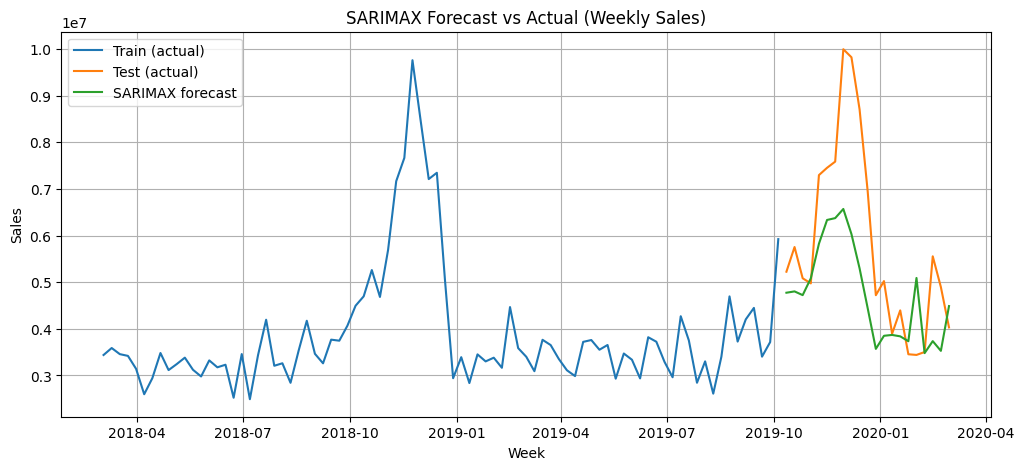

In [198]:
# ===============================
# STEP 4b — SARIMAX (weekly) with exogenous features
# Uses:
#   - train, test (from Step 3)
#   - SARIMAX_EXOG_COLS (from Step 2)
# ===============================

import numpy as np
import pandas as pd
import math
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return math.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = np.where(y_true == 0, 1e-9, y_true)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# 1) Target & exogenous matrices (align on same dates)
y_tr = train['sales'].copy()
y_te = test['sales'].copy()
ex_tr = train[SARIMAX_EXOG_COLS].copy()
ex_te = test[SARIMAX_EXOG_COLS].copy()

print("SARIMAX exogenous features:", list(ex_tr.columns))

# 2) Fit SARIMAX
# Simple, robust starting point for weekly data with seasonality:
#   non-seasonal (p,d,q) = (1,1,1)
#   seasonal   (P,D,Q,s) = (1,0,1, 52)
# You can tune these later if needed.
warnings.filterwarnings("ignore")

model = SARIMAX(
    endog=y_tr,
    exog=ex_tr,
    order=(1,1,1),
    seasonal_order=(1,0,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

res = model.fit(disp=False)
print(res.summary().tables[0])

# 3) Forecast on test range (dynamic one-step ahead)
pred = res.get_forecast(steps=len(y_te), exog=ex_te)
sarimax_pred = pd.Series(pred.predicted_mean, index=y_te.index, name='sarimax_pred')

# 4) Metrics
sar_mae  = mae(y_te, sarimax_pred)
sar_rmse = rmse(y_te, sarimax_pred)
sar_mape = mape(y_te, sarimax_pred)

print("\nSARIMAX performance on Test:")
print(f"  MAE  = {sar_mae:,.2f}")
print(f"  RMSE = {sar_rmse:,.2f}")
print(f"  MAPE = {sar_mape:,.2f}%")

# 5) Plot
plt.figure(figsize=(12,5))
plt.plot(y_tr.index, y_tr, label='Train (actual)')
plt.plot(y_te.index, y_te, label='Test (actual)')
plt.plot(sarimax_pred.index, sarimax_pred, label='SARIMAX forecast')
plt.title("SARIMAX Forecast vs Actual (Weekly Sales)")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# Keep for later comparison
SARIMAX_PRED = sarimax_pred.copy()
SARIMAX_SCORES = {'MAE': sar_mae, 'RMSE': sar_rmse, 'MAPE%': sar_mape}


Train-fit: (76, 16) | Train-val: (8, 16) | Test: (21, 16)
XGBoost performance on Test:
  MAE  = 460,944.66
  RMSE = 694,105.37
  MAPE = 6.62%


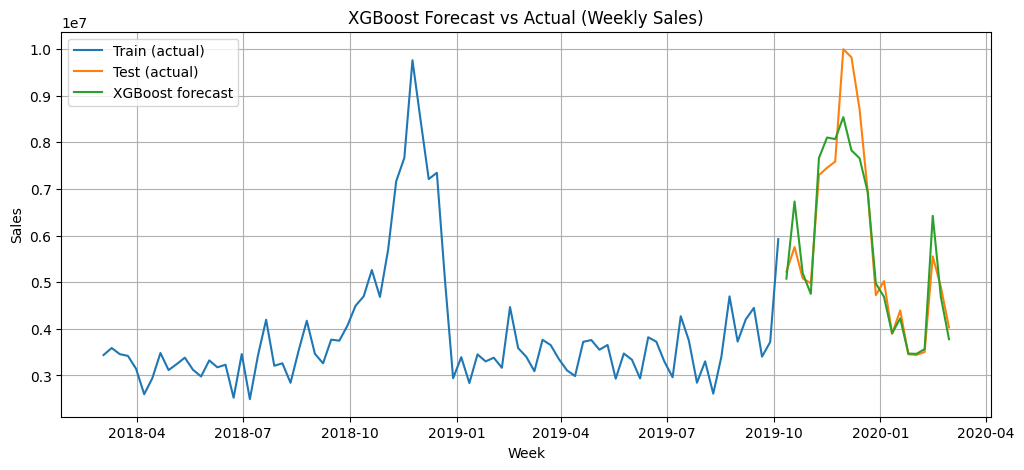

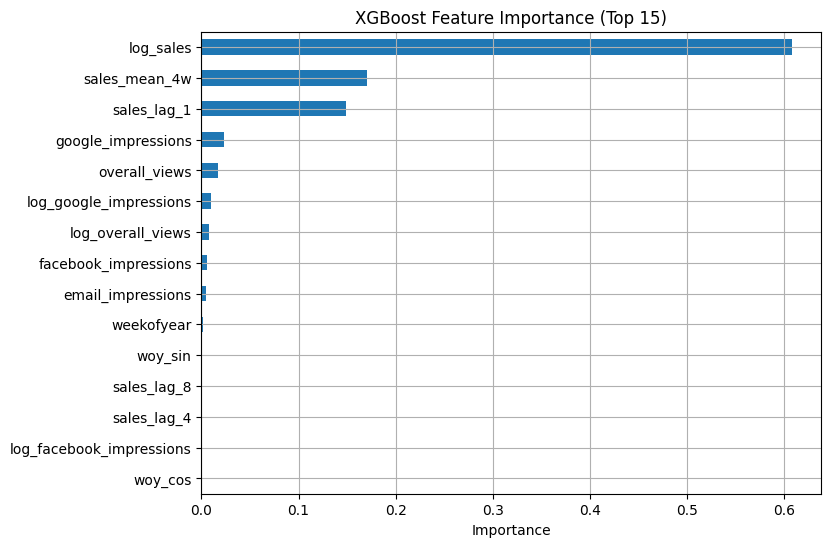

In [202]:
# ===============================
# STEP 4c — XGBoost (weekly) with engineered features
# Uses from earlier steps:
#   - features_weekly, ML_FEATURE_COLS
#   - train, test, X_train, y_train, X_test, y_test
# ===============================

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    denom = np.where(y_true == 0, 1e-9, y_true)
    return np.mean(np.abs((y_true - y_pred) / denom)) * 100

# ---------------------------------------
# 1) Create a small validation split from TRAIN (no leakage)
#    We'll keep the last 10% of the TRAIN period as a val set
# ---------------------------------------
n_tr = len(X_train)
val_size = max(1, int(0.1 * n_tr))
X_tr_fit = X_train.iloc[:-val_size]
y_tr_fit = y_train.iloc[:-val_size]
X_tr_val = X_train.iloc[-val_size:]
y_tr_val = y_train.iloc[-val_size:]

print("Train-fit:", X_tr_fit.shape, "| Train-val:", X_tr_val.shape, "| Test:", X_test.shape)

# ---------------------------------------
# 2) Define & fit XGBoost model
#    (robust defaults for tabular time series)
# ---------------------------------------
xgb = XGBRegressor(
    n_estimators=800,
    max_depth=6,
    learning_rate=0.03,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    reg_alpha=0.0,
    random_state=42,
    n_jobs=-1
)

xgb.fit(
    X_tr_fit, y_tr_fit,
    eval_set=[(X_tr_val, y_tr_val)],
    # eval_metric="rmse",
    verbose=False,
    # early_stopping_rounds=50
)

# ---------------------------------------
# 3) Predictions & metrics on TEST
# ---------------------------------------
xgb_pred = pd.Series(xgb.predict(X_test), index=y_test.index, name="xgb_pred")

xgb_mae  = mean_absolute_error(y_test, xgb_pred)
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mape = mape(y_test, xgb_pred)

print("XGBoost performance on Test:")
print(f"  MAE  = {xgb_mae:,.2f}")
print(f"  RMSE = {xgb_rmse:,.2f}")
print(f"  MAPE = {xgb_mape:,.2f}%")

# ---------------------------------------
# 4) Plot: actual vs forecast
# ---------------------------------------
plt.figure(figsize=(12,5))
plt.plot(y_train.index, y_train, label='Train (actual)')
plt.plot(y_test.index,  y_test,  label='Test (actual)')
plt.plot(xgb_pred.index, xgb_pred, label='XGBoost forecast')
plt.title("XGBoost Forecast vs Actual (Weekly Sales)")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------
# 5) Feature importance (top 15)
# ---------------------------------------
imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
topk = imp.head(15)

plt.figure(figsize=(8,6))
topk.sort_values().plot(kind='barh')
plt.title("XGBoost Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.grid(True)
plt.show()

# Keep for later comparison / export
XGB_PRED = xgb_pred.copy()
XGB_SCORES = {'MAE': xgb_mae, 'RMSE': xgb_rmse, 'MAPE%': xgb_mape}
XGB_MODEL = xgb
XGB_IMPORTANCE = imp


In [203]:
# ===============================
# STEP 5 — Final Leaderboard (all models)
# ===============================

import pandas as pd

# Collect scores from earlier steps
# (make sure BASELINE_SCORES, SARIMAX_SCORES, XGB_SCORES exist)

scores_all = []

# Baselines
for i, row in BASELINE_SCORES.iterrows():
    scores_all.append({
        'Model': row['model'],
        'MAE': row['MAE'],
        'RMSE': row['RMSE'],
        'MAPE%': row['MAPE%']
    })

# SARIMAX
scores_all.append({
    'Model': 'SARIMAX',
    'MAE': SARIMAX_SCORES['MAE'],
    'RMSE': SARIMAX_SCORES['RMSE'],
    'MAPE%': SARIMAX_SCORES['MAPE%']
})

# XGBoost
scores_all.append({
    'Model': 'XGBoost',
    'MAE': XGB_SCORES['MAE'],
    'RMSE': XGB_SCORES['RMSE'],
    'MAPE%': XGB_SCORES['MAPE%']
})

leaderboard = pd.DataFrame(scores_all).sort_values('RMSE').reset_index(drop=True)

print("\n=== Model Leaderboard (Weekly Sales Forecast) ===")
display(leaderboard)



=== Model Leaderboard (Weekly Sales Forecast) ===


,Model,MAE,RMSE,MAPE%
0,XGBoost,4.609447e+05,6.941054e+05,6.623765
1,Naive,8.973745e+05,1.190024e+06,15.845803
2,SARIMAX,1.301230e+06,1.710201e+06,20.179165
3,MA(4w),1.419384e+06,1.760240e+06,25.529462
4,MA(8w),1.927262e+06,2.227260e+06,36.708045
